## Dependencias

In [7]:
from pyspark import SparkContext,HiveContext
from pyspark.sql import SQLContext,SparkSession
from pyspark.sql import functions as F

import numpy as np
import pandas as pd

from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd

import os
import subprocess

from glob import glob

import asyncio

## Limpiar datos

In [3]:
ruta = '/stocks/'

In [4]:
cmd = f'hdfs dfs -ls {ruta}'
cmd

'hdfs dfs -ls /stocks/'

In [5]:
lst = subprocess.check_output(cmd,shell=True).decode('utf8').strip().split('\n')
lst = [x.split(' ')[-1] for x in lst]

['items',
 '/stocks/A.csv',
 '/stocks/AA.csv',
 '/stocks/AAAU.csv',
 '/stocks/AACG.csv',
 '/stocks/AADR.csv',
 '/stocks/AAL.csv',
 '/stocks/AAMC.csv',
 '/stocks/AAME.csv',
 '/stocks/AAN.csv',
 '/stocks/AAOI.csv',
 '/stocks/AAON.csv',
 '/stocks/AAP.csv',
 '/stocks/AAPL.csv',
 '/stocks/AAT.csv',
 '/stocks/AAU.csv',
 '/stocks/AAWW.csv',
 '/stocks/AAXJ.csv',
 '/stocks/AAXN.csv',
 '/stocks/AB.csv',
 '/stocks/ABB.csv',
 '/stocks/ABBV.csv',
 '/stocks/ABC.csv',
 '/stocks/ABCB.csv',
 '/stocks/ABEO.csv',
 '/stocks/ABEQ.csv',
 '/stocks/ABEV.csv',
 '/stocks/ABG.csv',
 '/stocks/ABIO.csv',
 '/stocks/ABM.csv',
 '/stocks/ABMD.csv',
 '/stocks/ABR.csv',
 '/stocks/ABT.csv',
 '/stocks/ABTX.csv',
 '/stocks/ABUS.csv',
 '/stocks/AC.csv',
 '/stocks/ACA.csv',
 '/stocks/ACAD.csv',
 '/stocks/ACAM.csv',
 '/stocks/ACAMU.csv',
 '/stocks/ACAMW.csv',
 '/stocks/ACB.csv',
 '/stocks/ACBI.csv',
 '/stocks/ACC.csv',
 '/stocks/ACCO.csv',
 '/stocks/ACEL.csv',
 '/stocks/ACER.csv',
 '/stocks/ACES.csv',
 '/stocks/ACGL.csv',
 '/

In [6]:
lst = sorted([a for a in lst if a.endswith('.csv')])

In [19]:
async def saludo(n:int):
    return f"Hola {n}"

In [26]:
async def limpiar(arch:str):
    nombre = arch.split('/')[-1].split('.')[0]
    print(nombre)
    df = spark.read.csv(arch,header=True,inferSchema=False)
    df = df.withColumn('date',F.to_timestamp(F.col('date')))
    df = df.drop('adjclose')
    for c in df.columns:
        if c!='date':
            df = df.withColumn(c,F.col(c).cast('double'))
    df = df.withColumn('stock',F.lit(nombre))
    df.write.parquet(f'/stocks_clean/{nombre}.parquet',mode='overwrite')

In [28]:
len(lst)

8143

In [38]:
muestra = list(np.random.choice(lst,replace=False,size=int(len(lst)*0.05)))

In [39]:
len(muestra),len(set(muestra))

(407, 407)

In [40]:
await asyncio.gather(*map(limpiar,muestra))

GFY
MDB
CTB
LEND
DBV
QUMU
APLE
FYLD
LBTYA
ASTE
UGI
EMHY
MILN
THWWW
PTEU
KELYA
BFRA
PQG
PSET
RCMT
AVAL
PCYO
ALTA
MHE
BKU
PBDM
RDHL
BRKL
JPEM
ASML
WDAY
LANDP
AI
TCRR
EWCO
MMD
ALRN
K
SRF
MGYR
KURE
NML
IMRNW
SAMG
EVSI
CNX
CTEK
RTIX
NIM
RIV
LFEQ
MITK
PCM
ORAN
FAF
JMM
EBMT
TJX
ADT
TEO
ERII
VAPO
ASIX
CAMP
VECO
OIH
PTBD
BIZD
HYLS
RUSL
NAN
DCF
KTH
MOTI
EKSO
HLX
NNN
QRVO
NMZ
MGRC
ADMS
APXTU
HJLIW
KLIC
BFIT
TSQ
YORW
COMB
RPTX
HEFA
ANIP
VTIQW
BBD
ARTW
INGR
CEZ
JPGB
BPMP
ANCN
COWZ
EMF
EXAS
TTGT
MGP
FEX
MFGP
SOXS
NSC
AWP
ZIG
CI
RDFN
STNE
NSL
UGBP
SOAC
MSUS
VFL
RCI
WBT
XHS
VLYPO
WEBS
DG
STM
VQT
SCHJ
BSCN
FNGZ
FI
IBMN
KRNY
NPV
FTAC
TDE
RH
OLP
WPG
ACWF
ICLR
PLAG
NWPX
GARS
DMRC
UEC
WWR
AMEH
KROS
DGBP
ALTR
ALKS
FTSL
CTHR
MG
KEP
LOW
CVEO
EVRG
NUEM
KDMN
CSB
ESSA
HCC
TCCO
LTM
OPBK
COFS
H
JPMB
CHMG
NAZ
ZAGG
DWSN
EEMD
MRC
ANGO
IPV
EPRF
SGEN
RFIL
PLOW
XLI
SMTC
HGV
SAF
FFBC
ENTA
QEFA
LM
STAF
TAIT
APOPW
TZACW
NFBK
FMCI
HUBS
ESML
IHY
LQDH
KERNW
ASRVP
MNCLU
WYND
TELA
POTX
NBH
AVUV
BIT
UDR
BMY
BWXT
ODP
IBHA
RC
WORK

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## Lectura de datos de HDFS a spark

In [43]:
%%time
df = spark.read.parquet('/stocks_clean/*.parquet')

CPU times: user 5.17 ms, sys: 0 ns, total: 5.17 ms
Wall time: 9.8 s


In [44]:
df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- volume: double (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- stock: string (nullable = true)



## Operaciones básicas

In [45]:
df.count()

1136350

In [46]:
df.select('date','close').show(5)

+-------------------+------------------+
|               date|             close|
+-------------------+------------------+
|2020-07-02 00:00:00| 59.13999938964844|
|2020-07-01 00:00:00| 59.43000030517578|
|2020-06-30 00:00:00| 58.79999923706055|
|2020-06-29 00:00:00| 57.79999923706055|
|2020-06-26 00:00:00|57.540000915527344|
+-------------------+------------------+
only showing top 5 rows



In [49]:
df.describe('close').show()

+-------+-----------------+
|summary|            close|
+-------+-----------------+
|  count|          1136350|
|   mean|68.27508619993976|
| stddev|1079.691342310042|
|    min|              0.0|
|    max|         132040.0|
+-------+-----------------+



In [50]:
df2 = df.filter((df['close']>100))

In [51]:
df2.count()

60096

In [52]:
df2.select('stock','close').show(5)

+-----+------------------+
|stock|             close|
+-----+------------------+
|   CI|190.49000549316406|
|   CI|             190.5|
|   CI|187.64999389648438|
|   CI| 187.5500030517578|
|   CI|185.05999755859375|
+-----+------------------+
only showing top 5 rows



## Funciones definidas por el usuario

In [53]:
func_mes = F.udf(lambda x:int(x.strftime('%Y%m')))

In [54]:
df.withColumn('mes',func_mes(F.col('date'))).select('date','mes').show(5)

+-------------------+------+
|               date|   mes|
+-------------------+------+
|2020-07-02 00:00:00|202007|
|2020-07-01 00:00:00|202007|
|2020-06-30 00:00:00|202006|
|2020-06-29 00:00:00|202006|
|2020-06-26 00:00:00|202006|
+-------------------+------+
only showing top 5 rows



In [55]:
df = df.withColumn('mes',func_mes(F.col('date')).cast('integer'))

In [56]:
df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- volume: double (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- stock: string (nullable = true)
 |-- mes: integer (nullable = true)



In [57]:
var = ['volume', 'open', 'high', 'low', 'close']

In [58]:
expr = [f(F.col(v)).alias(f'x_{n}_{v}') for v in var for f,n in zip([F.min,F.max,F.stddev,F.mean],['minimo','maximo','desviacion','media'])]

In [60]:
df.groupBy('stock').agg(*expr).show()

+-----+---------------+---------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+
|stock|x_minimo_volume|x_maximo_volume|x_desviacion_volume|    x_media_volume|      x_minimo_open|     x_maximo_open|  x_desviacion_open|      x_media_open|      x_minimo_high|     x_maximo_high|  x_desviacion_high|      x_media_high|       x_minimo_low|      x_maximo_low|   x_desviacion_low|       x_media_low|     x_minimo_close|    x_maximo_close|x_desviacion_close|     x_media_close|
+-----+---------------+---------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-----

## Uso de SQL

In [65]:
type(spark)

pyspark.sql.session.SparkSession

In [66]:
sqlContext = SQLContext(spark)

In [67]:
df.registerTempTable('acciones')

In [68]:
query= """
    SELECT 
    stock, MAX(close) AS maximo_precio, COUNT(*) AS cotizaciones
    FROM
        acciones
    GROUP BY stock
    ORDER BY maximo_precio DESC
"""

In [69]:
tabla = sqlContext.sql(query)

In [70]:
type(tabla)

pyspark.sql.dataframe.DataFrame

In [71]:
tabla.count()

406

In [72]:
tabla.show()

+-----+------------------+------------+
|stock|     maximo_precio|cotizaciones|
+-----+------------------+------------+
| SOXS|          132040.0|        2339|
|  WWR|           84120.0|        2486|
|  SRF|           14300.0|        2089|
| VIXY|           12195.0|        2390|
|  TMV|            4920.0|        2824|
| CLBS|            2812.5|        2992|
| RUSL|1834.9200439453125|        2252|
|  OIH|1494.7332763671875|        4869|
| NAKD|1399.5999755859375|        1084|
|  CEZ|            1360.0|        4695|
|  ERX| 1350.300048828125|        2924|
| SNCA|1211.5999755859375|        3126|
|  MFH| 959.2000122070312|        1228|
| EKSO|            803.25|        1613|
| REXN|             720.0|        3065|
| CDOR| 660.1307373046875|        4821|
|   AI| 560.4000244140625|        5668|
|  ODP| 444.6000061035156|        8087|
|  TFX| 395.1400146484375|       10160|
| ANIP| 375.8399963378906|        4380|
+-----+------------------+------------+
only showing top 20 rows



## Interacción con Hive

In [73]:
tabla.createOrReplaceTempView('agrupado')

In [74]:
hiveContext = HiveContext(spark)

In [75]:
hiveContext.sql('create table stocks.agrupado as select * from agrupado')

DataFrame[]

In [76]:
tabla = hiveContext.table('stocks.agrupado')

In [77]:
tabla.printSchema()

root
 |-- stock: string (nullable = true)
 |-- maximo_precio: double (nullable = true)
 |-- cotizaciones: long (nullable = true)



In [78]:
tabla.count()

406

## Cruces

In [79]:
df3 = df.join(df2.select('stock','date'),['stock','date'],'inner')

In [80]:
df3.count()

60096

## Convertir a pandas

In [81]:
aux = tabla.toPandas()

In [82]:
aux

,stock,maximo_precio,cotizaciones
0,SOXS,132040.000,2339
1,WWR,84120.000,2486
2,SRF,14300.000,2089
3,VIXY,12195.000,2390
4,TMV,4920.000,2824
...,...,...,...
401,TZACW,0.460,1
402,CREXW,0.410,1
403,APOPW,0.099,1
404,THWWW,0.089,1


In [84]:
%matplotlib inline

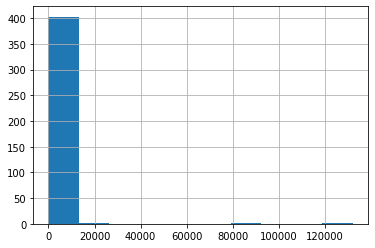

In [85]:
aux['maximo_precio'].hist()

In [88]:
aux = spark.createDataFrame(aux[(aux['maximo_precio']<100)&(aux['maximo_precio']>80)])

In [89]:
type(aux)

pyspark.sql.dataframe.DataFrame

In [90]:
aux.printSchema()

root
 |-- stock: string (nullable = true)
 |-- maximo_precio: double (nullable = true)
 |-- cotizaciones: long (nullable = true)



In [91]:
aux.show(6)

+-----+-----------------+------------+
|stock|    maximo_precio|cotizaciones|
+-----+-----------------+------------+
| ALKS|          98.0625|        7297|
|  ABT|             98.0|       10162|
| WTFC|97.55999755859375|        5582|
| QCOM|95.91000366210938|        7192|
|CNBKA|94.48999786376953|        7642|
|    H|92.86000061035156|        2682|
+-----+-----------------+------------+
only showing top 6 rows

